## Part 1- Image Classifier

##### This notebook trains a neural network model to classify images of clothing, such as sneakers and shirts. Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. 

In [37]:
#import and load the Fashion MNIST data directly from TensorFlow

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Loading the data: 
#### The train_images and train_labels arrays are the training set—the data the model uses to learn.The model is tested against the test set, the test_images, and test_labels arrays.The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. 

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [138]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [39]:
train_images.shape

(60000, 28, 28)

In [40]:
len(train_labels)

60000

In [41]:

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [42]:
test_images.shape

(10000, 28, 28)

In [43]:
len(test_labels)

10000

### Preprocess data:

####  If we inspect the first image in the training set, we will see that the pixel values fall in the range of 0 to 255

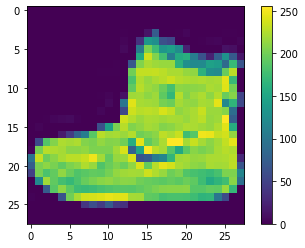

In [44]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### We scale these values to a range of 0 to 1 before feeding them to the neural network model. So, we divide the values by 255 as it's important that the training set and the testing set be preprocessed in the same way.

In [45]:

train_images = train_images / 255.0

test_images = test_images / 255.0

In [139]:
validation_images = train_images[:5000]
validation_labels = train_labels[:5000]

In [140]:
class_names[train_labels[2]]

'T-shirt/top'

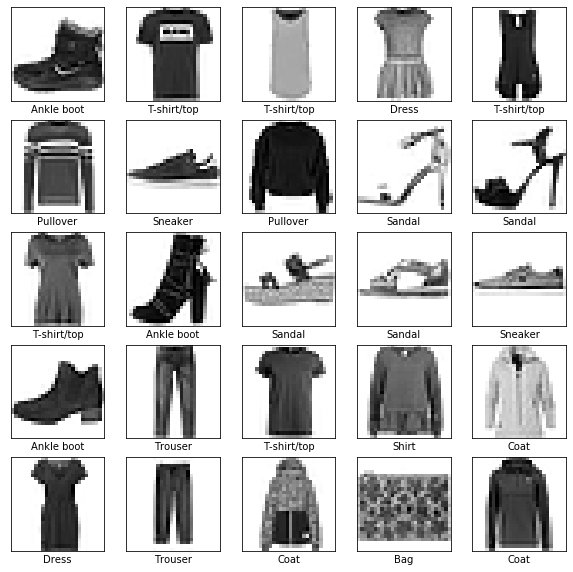

In [46]:
#Display the first 25 images from the training set 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Model 1

### Build the model

#### Build the neural network, configure the layers of the model and then compiling the model

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10),
    
])


#### The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

#### After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### The loss values accompanied by an optimizer algorithm facilitates the number of changes made to the weights within the network

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### By calling the summary method, we gain information on the model properties such as layers, layer type, shapes, number of weights in the model, and layers

In [50]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5048 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3806 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3409 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3139 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2973 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2801 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2682 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2573 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2473 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

#### This model reaches an accuracy of about 0.91 (or 91%) on the training data

In [51]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3303 - accuracy: 0.8849

Test accuracy: 0.8848999738693237


#### It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting

#### With the model trained, now we make predictions about some images and a softmax layer is added to convert the logits to probabilities, which are easier to interpret.

In [52]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [53]:
predictions = probability_model.predict(test_images)

In [54]:
#confidence
predictions[0]

array([1.6373039e-07, 2.1447251e-09, 4.5443876e-08, 3.3238332e-11,
       2.5591721e-08, 1.1822094e-02, 1.2394032e-06, 2.6919635e-02,
       2.5489128e-06, 9.6125424e-01], dtype=float32)

In [55]:
np.argmax(predictions[0])

9

In [56]:
test_labels[0]

9

#### So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [57]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### Let's verify the predictions and look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

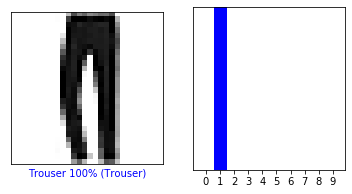

In [58]:

i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

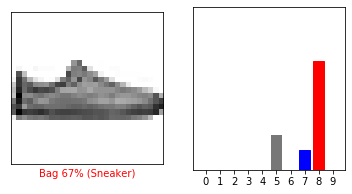

In [59]:

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

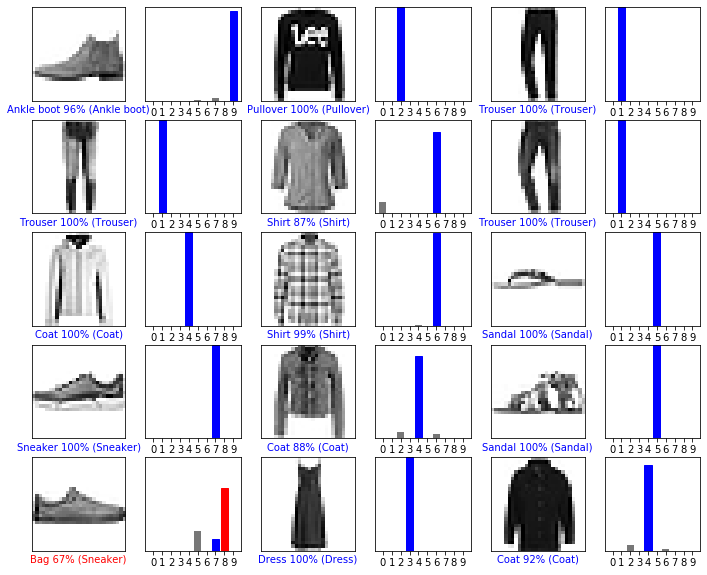

In [60]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.show()

In [61]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [62]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [63]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.79335018e-06 2.90245866e-12 9.99863744e-01 1.04525882e-12
  1.13422204e-04 5.20379125e-17 1.99872629e-05 2.03260572e-20
  4.42210546e-10 3.04722452e-17]]


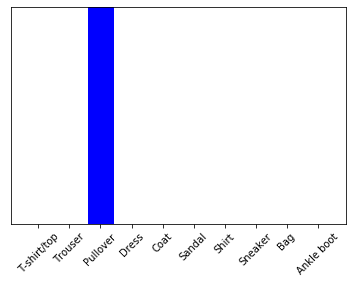

In [64]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [65]:
np.argmax(predictions_single[0])

2

#### So the predicted label is 2 which pullover for the image in the batch

### Model 2

#### The first three layers use the ReLU activation function, while the last layer uses a softmax activation.

In [141]:
# Classification MLP(Multilayer perceptron) with two hidden layers
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation=keras.activations.relu),
    keras.layers.Dense(250, activation=keras.activations.relu),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [142]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_19 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_20 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


#### Optimization Algorithms:
##### Stochastic Gradient Descent
##### Mini Batch Gradient Descent
##### Nesterov Accelerated Gradient

In [143]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

#### TensorBoard provides visual insights into the events that occur during training at each epoch.The training visualization provided by TensorBoard is stored in a ‘runs’ folder directory. We create a function to generate a folder directory and identify each log via a timestamp.

In [151]:
import os
import time
root_logdir = os.path.join(os.curdir, "runs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

#### The default batch size within Keras when training a neural network is 32. The network is trained for a total of 20 epochs. With the utilization of early stopping, a halt to training is made once no improvement in the validation loss is recorded after 3 epochs. Early stopping can save hours, especially when the model begins to overfit.

In [164]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
model2.fit(train_images, train_labels, epochs=20, validation_data=(validation_images, validation_labels), callbacks=[tensorboard_cb, early_stopping_cb])

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1557 - accuracy: 0.9402 - val_loss: 0.1201 - val_accuracy: 0.9548
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1477 - accuracy: 0.9436 - val_loss: 0.1301 - val_accuracy: 0.9468
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1450 - accuracy: 0.9441 - val_loss: 0.1328 - val_accuracy: 0.9480
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1420 - accuracy: 0.9457 - val_loss: 0.1295 - val_accuracy: 0.9480


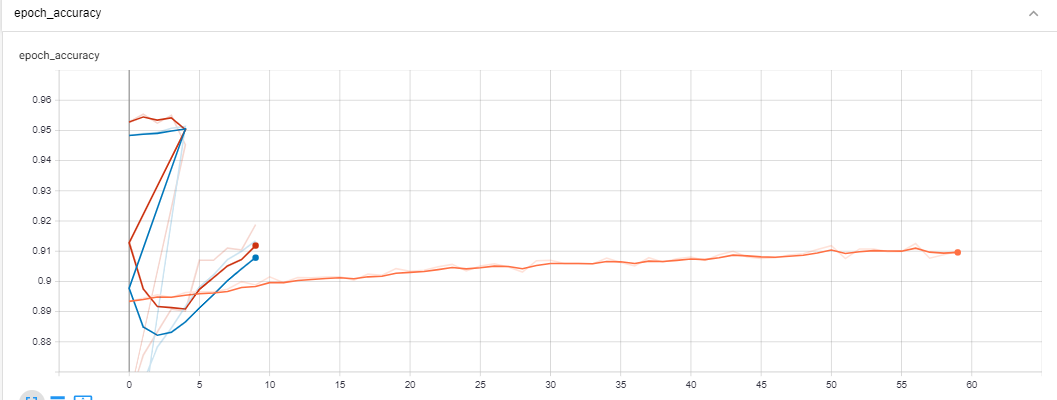

In [165]:
#snapshot from tensorboard
from IPython.display import display, Image
display(Image(filename='C:/Users/Saloni/Downloads/Capture.png'))

# tensorboard --logdir=runs

In [166]:
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3741 - accuracy: 0.8949


[0.3741362988948822, 0.8949000239372253]

#### The accuracy of this model is 89% which is more than the previous model above.

In [167]:
practical_test_images =  test_images[:10]
model_prediction = model2.predict_classes(practical_test_images)
model_prediction

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7], dtype=int64)

#### The probability vector contains 10 elements, and each element in the vector corresponds to the likelihood of the occurrence of a class from the 10 pieces of clothing classes

In [168]:
np.array(class_names)[model_prediction]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'T-shirt/top',
       'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

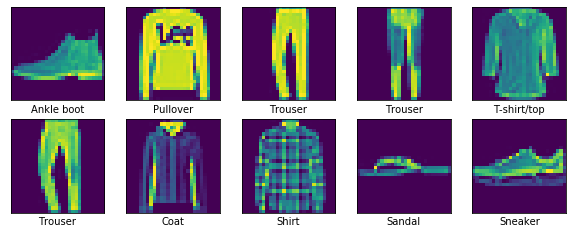

In [169]:
# Visualise the prediction result
plt.figure(figsize=(10,10))
for i in range(len(practical_test_images)):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(practical_test_images[i])
    plt.xlabel(class_names[model_prediction[i]])
plt.show()

## Part 2- Image Segmentation

### Region-based segmentation

In [95]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

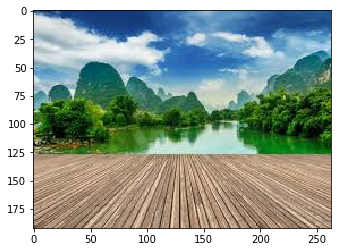

In [98]:
#read the image and plot
image = plt.imread('C:/Users/Saloni/Downloads/1.jpeg')
image.shape
plt.imshow(image)

#### A three-channel image (RGB) converted into grayscale so that we only have a single channel

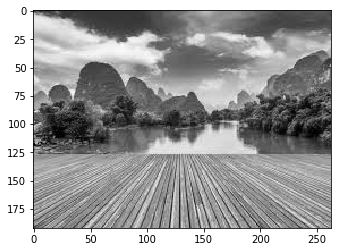

In [99]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

#### We want to apply a certain threshold to this image. This threshold should separate the image into two parts – the foreground and the background. Before we do that, let’s quickly check the shape of this image:

In [100]:
gray.shape

(192, 263)

#### The height and width of the image is 192 and 263 respectively. We will take the mean of the pixel values and use that as a threshold. If the pixel value is more than our threshold, we can say that it belongs to an object. If the pixel value is less than the threshold, it will be treated as the background.

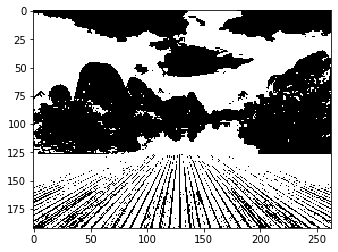

In [101]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

#### The darker region (black) represents the background and the brighter (white) region is the foreground. We can define multiple thresholds as well to detect multiple objects

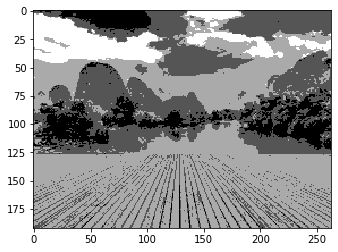

In [102]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

#### There are four different segments in the above image.

#### Limitations: When we don’t have significant grayscale difference, or there is an overlap of the grayscale pixel values, it becomes very difficult to get accurate segments. 

 

### Clustering based using k-means

(192, 263, 3)


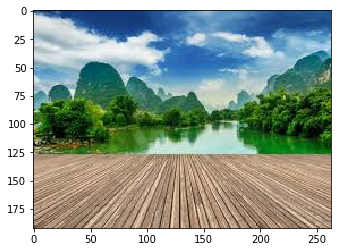

In [103]:
pic = plt.imread('C:/Users/Saloni/Downloads/1.jpeg')/255   # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

#### It’s a 3-dimensional image of shape (192, 263, 3). For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels)

In [104]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

In [124]:
#selecting 5 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

#### The cluster_centers_ function of k-means will return the cluster centers and labels_ function will give us the label for each pixel (it will tell us which pixel of the image belongs to which cluster).

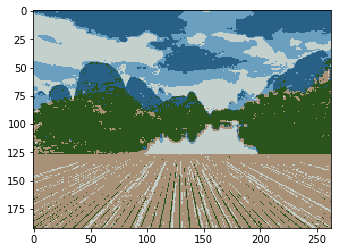

In [125]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

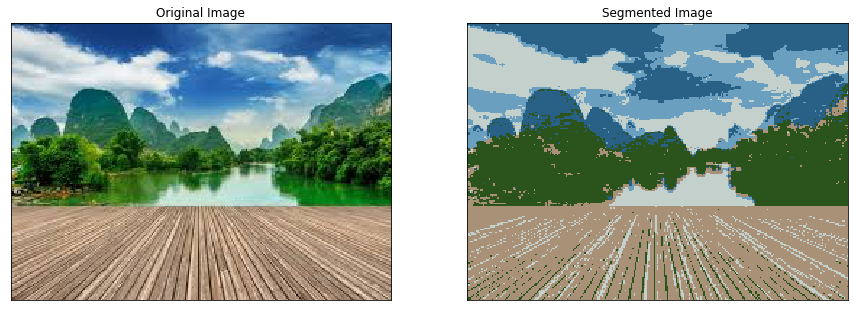

In [135]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(pic)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(cluster_pic)
plt.title('Segmented Image'), plt.xticks([]), plt.yticks([])
plt.show()

#### We can see the difference between the original and the segmented image and segment the image pretty well. 

#### Limitations: k-means works really well when we have a small dataset. It can segment the objects in the image and give impressive results. But the algorithm hits a roadblock when applied on a large dataset (more number of images).